In [2]:
# Bleu_score data cleaning
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bleu_score=open("bleuoutput.txt",'r')
bs_data=[]
for line in bleu_score:
    a=re.sub(r',',"",line)
    b=re.sub(r'BLEU = ',"",a)
    c=re.sub(r'/'," ",b)
    d=re.sub(r'BP=',"",c)
    e=re.sub(r'ratio=',"",d)
    f=re.sub(r'hyp_len=',"",e)
    g=re.sub(r'ref_len=',"",f)
    h=re.sub(r'\)',"",g)
    i=re.sub(r'\(',"",h)
    j=re.sub(r'\n',"",i)
    bs_data.append(j)
bleu_score.close()
print(bs_data)

['0.00 0.0 0.0 0.0 0.0 0.000 0.088 100 1132', '0.00 0.0 0.0 0.0 0.0 0.000 0.088 100 1132', '0.00 0.3 0.0 0.0 0.0 1.000 8.834 10000 1132', '0.00 0.9 0.0 0.0 0.0 0.368 0.500 566 1132', '0.00 0.1 0.0 0.0 0.0 1.000 8.834 10000 1132', '0.00 0.0 0.0 0.0 0.0 0.000 0.088 100 1132', '0.00 0.1 0.0 0.0 0.0 1.000 8.834 10000 1132', '0.00 0.0 0.0 0.0 0.0 0.000 0.088 100 1132', '0.00 0.0 0.0 0.0 0.0 1.000 8.834 10000 1132', '0.00 0.0 0.0 0.0 0.0 0.000 0.088 100 1132', '0.00 0.3 0.0 0.0 0.0 1.000 8.834 10000 1132', '0.00 10.6 0.0 0.0 0.0 0.002 0.141 160 1132']


In [3]:
# data in proper dimensions
final_data=[]
for data in bs_data:
    final_data.append(list(map(float,data.split())))
final_data

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.088, 100.0, 1132.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.088, 100.0, 1132.0],
 [0.0, 0.3, 0.0, 0.0, 0.0, 1.0, 8.834, 10000.0, 1132.0],
 [0.0, 0.9, 0.0, 0.0, 0.0, 0.368, 0.5, 566.0, 1132.0],
 [0.0, 0.1, 0.0, 0.0, 0.0, 1.0, 8.834, 10000.0, 1132.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.088, 100.0, 1132.0],
 [0.0, 0.1, 0.0, 0.0, 0.0, 1.0, 8.834, 10000.0, 1132.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.088, 100.0, 1132.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.834, 10000.0, 1132.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.088, 100.0, 1132.0],
 [0.0, 0.3, 0.0, 0.0, 0.0, 1.0, 8.834, 10000.0, 1132.0],
 [0.0, 10.6, 0.0, 0.0, 0.0, 0.002, 0.141, 160.0, 1132.0]]

In [7]:
# creating csv file
df=pd.DataFrame(final_data,columns=["BLEU","S1","S2","S3","S4","BP", "ratio", "hyp_len", "ref_len"])
df.head()

,BLEU,S1,S2,S3,S4,BP,ratio,hyp_len,ref_len
0,0.0,0.0,0.0,0.0,0.0,0.000,0.088,100.0,1132.0
1,0.0,0.0,0.0,0.0,0.0,0.000,0.088,100.0,1132.0
2,0.0,0.3,0.0,0.0,0.0,1.000,8.834,10000.0,1132.0
3,0.0,0.9,0.0,0.0,0.0,0.368,0.500,566.0,1132.0
4,0.0,0.1,0.0,0.0,0.0,1.000,8.834,10000.0,1132.0


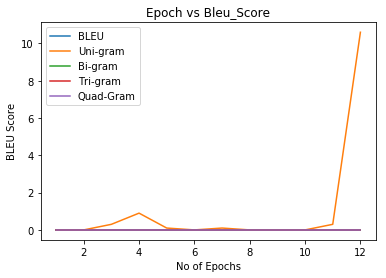

In [25]:
# plotting the data
plt.plot(np.arange(1,13),df["BLEU"],label="BLEU")
plt.plot(np.arange(1,13),df["S1"],label="Uni-gram")
plt.plot(np.arange(1,13),df["S2"],label="Bi-gram")
plt.plot(np.arange(1,13),df["S3"],label="Tri-gram")
plt.plot(np.arange(1,13),df["S4"],label="Quad-Gram")
plt.title("Epoch vs Bleu_Score")
plt.xlabel("No of Epochs")
plt.ylabel("BLEU Score")
plt.legend()
plt.savefig("Bleu_score.jpeg")
plt.show()


In [24]:
# saving data in as csv file
df.to_csv("Bleu_Score.csv",index=None)

In [ ]:
# saving graph